<a href="https://colab.research.google.com/github/MukhtarAqalmand/KidenyDiseasePrediction/blob/main/KidneyDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Probability Assignment

#Problem Statement
Diseases are medical conditions associated with some symptoms and signs. For most diseases, detecting and diagnosing them at an early stage can save someone’s life. For example, the 5-year survival  rate for women diagnosed with cervical cancer before it has spread is 92%, compared to 15% for cervical cancer diagnosed at a later stage.iThe current COVID situation has also taught us that infections don’t only spread individually but also through communities. This prompts us to build expert systems and inference engines that can infer probable outcomes and results based on previous data such as recognized symptoms, demographic information, spread rate, geographical information, previously diagnosed conditions, current diseases, etc. While the task of building such an expert system may seem daunting as first, the mathematics behind these models is entirely based on probabilities and statistics. In this project, we will build an  expert  system  using  probabilistic  decision  trees  and  Bayesian  Inference  on  a  real-world problem. The choice of problem is open-ended but it should be relevant to the medicaldomain.  For example, you can assume a problem:•Where you’re asked to infer whether a person suffers from a certain condition given his demographic information, test results, symptoms, based on past prior information.•Decide which areas to put into complete lockdown to prevent virus outbreak. The priordata  can  include  infection  rate,  population  demographics,  health  provider  standards, common diseases and health information, past trends, infections in neighboring areas, etc.
While the task of building such an expert system may seem daunting as first, the mathematics behind these models is entirely based on probabilities and statistics. In this project, we will build an  expert  system  using  probabilistic  decision  trees  and  Bayesian  Inference  on  a  real-world problem. The choice of problem is open-ended but it should be relevant to the medicaldomain.  
For example, you can assume a problem:
- Where you’re asked to infer whether a person suffers from a certain condition given his demographic information, test results, symptoms, based on past prior information.
- Decide which areas to put into complete lockdown to prevent virus outbreak. The priordata  can  include  infection  rate,  population  demographics,  health  provider  standards, common diseases and health information, past trends, infections in neighboring areas, etc.

In [ ]:
#importing libraries for the assignment
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

import matplotlib.pyplot as plt
import pylab as pl

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Decision Tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets

import scipy.stats as ss
import seaborn as sns; sns.set()

import pydotplus

from google.colab import drive




---

#**Step:1**
- Get  a  dataset,  which  will  serve  as  prior  factual  information.  You  can  head  on  to https://www.kaggle.comto download a dataset relevant to your defined problem. Most datasets are in CSV (Comma SeparatedValues) format.

Data Set for kidney disease taken from https://www.kaggle.com/mansoordaku/ckdisease


In [ ]:

drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/My Drive/Probability_CEP/kidney_disease.csv')

Mounted at /content/gdrive


In [ ]:
#Check the 10 samples of train data
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


Source: https://www.kaggle.com/mansoordaku/ckdisease/discussion/128941
 bp - blood pressure
- sg - specific gravity
- al - albumin
- su - sugar
- rbc - red blood cells
- pc - pus cell
- pcc - pus cell clumps
- ba - bacteria
- bgr - blood glucose random
- bu - blood urea
- sc - serum creatinine
- sod - sodium
- pot - potassium
- hemo - hemoglobin
- pcv - packed cell volume
- wc - white blood cell count
- rc - red blood cell count
- htn - hypertension
- dm - diabetes mellitus
- cad - coronary artery disease
- appet - appetite
- pe - pedal edema
- ane - anemia
- class - class



---


##**Step: 2**
####Process the dataset. Processing steps can include:
1. Removing fields with missing or wrong information
2. Converting continuous values into discrete ranges (such as age groups)
3. Removing personal information (such as name, identification numbers)
4. Datasets can be fairly large (can have millions of records). Limit yourself to a few hundred to get started and get a feel of the problem. You can include more records (or inputs) as you see fit.


Renaming Column for better Understanding


In [ ]:
# Dictionary
NewCols={"bp":"blood_pressure","sg":"specific_gravity", "al":"albumin","su":"sugar","rbc":"red_blood_cells","pc":"pus_cell",
         "pcc":"pus_cell_clumps","ba":"bacteria","bgr":"blood_glucose_random","bu":"blood_urea","sc":"serum_creatinine",
         "sod":"sodium","pot":"potassium","hemo":"haemoglobin","pcv":"packed_cell_volume","wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count","htn":"hypertension","dm":"diabetes_mellitus","cad":"coronary_artery_disease",
          "appet":"appetite","pe":"pedal_edema","ane":"anemia"}

# Change columns of CKD data to new columns
data.rename(columns=NewCols, inplace=True)

In [ ]:
#check summary of numerical data  such as count , mean , max , min  and standard deviation.
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Replacing String values with numerical values for better computation


In [ ]:
# Drop id column 

data[['red_blood_cells','pus_cell']] = data[['red_blood_cells','pus_cell']].replace(to_replace={'abnormal':1,'normal':0})
data[['pus_cell_clumps','bacteria']] = data[['pus_cell_clumps','bacteria']].replace(to_replace={'present':1,'notpresent':0})
data[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = data[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].replace(to_replace={'yes':1,'no':0})
data[['appetite']] = data[['appetite']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace='\tno',value=0)
data['diabetes_mellitus'] = data['diabetes_mellitus'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
data['classification'] = data['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

data['pedal_edema'] = data['pedal_edema'].replace(to_replace='good',value=0) 
data['appetite'] = data['appetite'].replace(to_replace='no',value=0)
data['coronary_artery_disease']=data['coronary_artery_disease'].replace('yes',1)

In [ ]:
data.head(10)

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,6,68.0,70.0,1.010,0.0,0.0,NaN,0.0,0.0,0.0,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,7,24.0,NaN,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0


Handling missing or null values


Source https://www.kaggle.com/zainaali/ckd-analysis-visualization-classification

In [ ]:
#Check total missing values in each feature
data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

In [ ]:
#Replacing missing values with the mean values of the column

data['age']=data['age'].fillna(np.mean(data['age']))
data['blood_pressure']=data['blood_pressure'].fillna(np.mean(data['blood_pressure']))
data['albumin']=data['albumin'].fillna(np.mean(data['albumin']))

data['specific_gravity']=data['specific_gravity'].fillna(np.mean(data['specific_gravity']))
data['sugar']=data['sugar'].fillna(np.mean(data['sugar']))
data['blood_glucose_random']=data['blood_glucose_random'].fillna(np.mean(data['blood_glucose_random']))
data['blood_urea']=data['blood_urea'].fillna(np.mean(data['blood_urea']))
data['serum_creatinine']=data['serum_creatinine'].fillna(np.mean(data['serum_creatinine']))
data['haemoglobinhaemoglobin']=data['haemoglobin'].fillna(np.mean(data['haemoglobin']))
data['potassium']=data['potassium'].fillna(np.mean(data['potassium']))
data['sodium']=data['sodium'].fillna(np.mean(data['sodium']))

data = data.replace("\t?", np.nan)
data = data.replace(" ?", np.nan)
data = data.fillna(method='ffill')
data = data.fillna(method='backfill')



In [ ]:
# Again ,Check missing values
data.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
haemoglobinhaemoglobin     0
dtype: int64

In [ ]:
data

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification,haemoglobinhaemoglobin
0,0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,15.4
1,1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38,6000,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.3
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31,7500,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9.6
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0,11.2
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.7
396,396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.5
397,397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.8
398,398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.2


##**Step 3:**
####Visualize the data. 
Try using Microsoft Excel built in graph tools, such as Line, Bar, Pie, Histogram, etc. to understand what the data really means. This will also help in remove any outliers or redundant information (features).Also plot joint or individual distributions(PMF) and correlations by assuming each feature as a Random Variable to see whether it bears any significance on the diagnosis

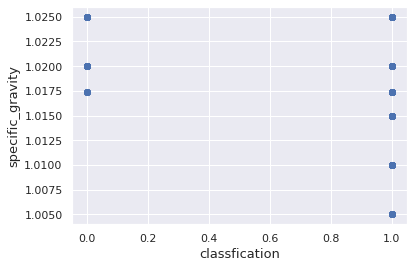

In [ ]:

plt.scatter(data['classification'],data['specific_gravity'])
plt.ylabel('specific_gravity', fontsize=13)
plt.xlabel('classfication', fontsize=13)
plt.show()

Text(0, 0.5, 'age')

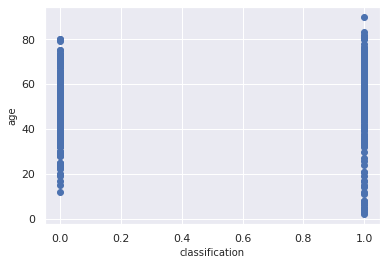

In [ ]:
plt.scatter(data['classification'],data['age'])
plt.xlabel('classification',fontsize=10)
plt.ylabel('age',fontsize=10)

Text(0, 0.5, 'blood_pressure')

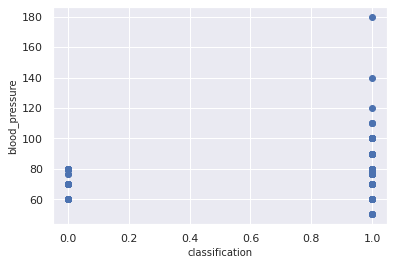

In [ ]:
plt.scatter(data['classification'],data['blood_pressure'])
plt.xlabel('classification',fontsize=10)
plt.ylabel('blood_pressure',fontsize=10)


Text(0, 0.5, 'albumin')

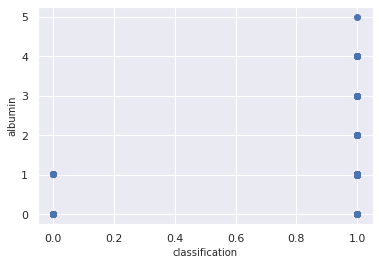

In [ ]:
plt.scatter(data['classification'],data['albumin'])
plt.xlabel('classification',fontsize=10)
plt.ylabel('albumin',fontsize=10)


Text(0, 0.5, 'white_blood_cell_count')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


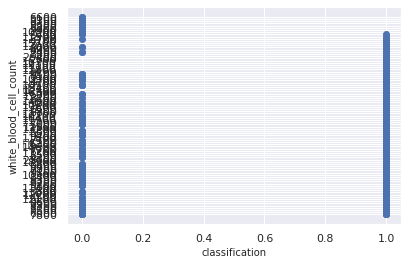

In [ ]:
plt.scatter(data['classification'],data['white_blood_cell_count'])
plt.xlabel('classification',fontsize=10)
plt.ylabel('white_blood_cell_count',fontsize=10)


Text(0, 0.5, 'haemoglobin')

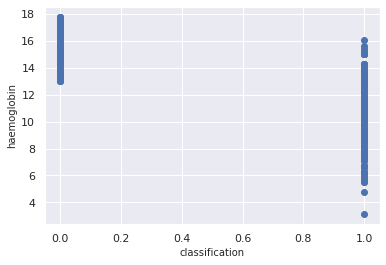

In [ ]:
plt.scatter(data['classification'],data['haemoglobin'])
plt.xlabel('classification',fontsize=10)
plt.ylabel('haemoglobin',fontsize=10)


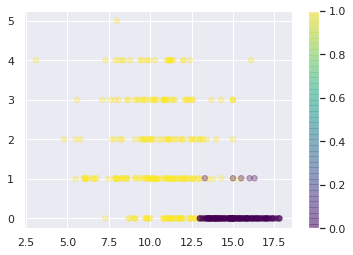

In [ ]:
plt.scatter(x=data['haemoglobin'], y=data['albumin'], s=30,c=data['classification'], alpha=0.3,cmap='viridis')
plt.colorbar();  # show color scale

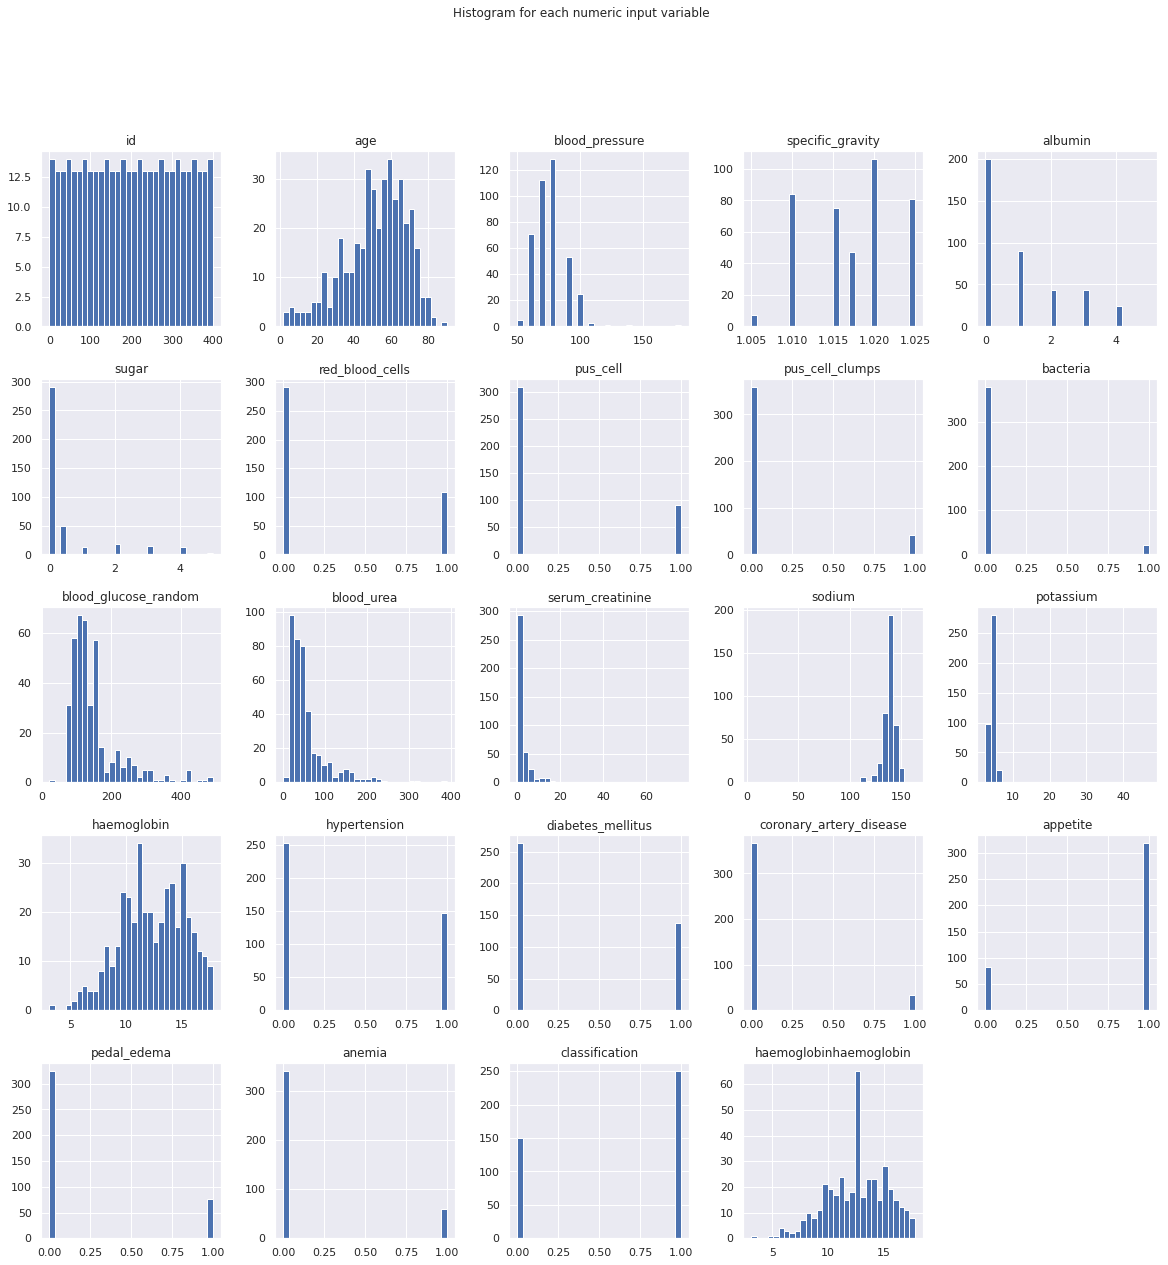

In [ ]:

data.hist(bins=30, figsize=(20,20))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

#Step 4:
Build a Decision Tree model of the data. A gentle introduction to them can be found here: https://blog.paperspace.com/decision-trees/.
This tree acts as an ‘expert system’ that takes in a query (such as possible systems) and outputs result (such as if the person is suffering a certain disease).(decision trees are optional)

#Decision Tree

In [ ]:

# creating the model
decisiontree = DecisionTreeClassifier(random_state=0) 
features = pd.DataFrame(data.drop('classification', axis=1)).to_numpy()
model = decisiontree.fit(features, data['classification'])
observation= [[57.0,60.0,1.025,0.0,0.0,1.0,1.0,1.0,1.0,0.0,114.000000,50.0,1.0,285.000000,8.900000,14.2,81,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,14.2]]
model.predict(observation)

array([1.])

#Step5
In real world scenarios, decisions and probabilities are continuously changing as new data is  observed.  For  example,  if  health  conditions  are  improving,  the  chances  of  virus spreading will decrease. In situations where we need to update our‘beliefs’ about a certain variable as new information is obtained, Bayesian Inference is used:
1. Building  Bayesian  Models  on  large  number  of  parameters  can  be  pretty complicated. Instead, choose features from the dataset (preferably not more than 5) which give the most information.
2. Assume a prior distribution and update your model by using data from the dataset. Visualize how your model automatically adapts to changes and trends.
3. You can also assume an imaginary situation and feed your model artificial data to visualize if your model adapts to changing dynamics. This will help you realize the importance of choosing a well-suited prior distribution.
4. Assume that all parameters are dependent or independent ofeach other. 
5. Optional: Are all parameters really independent. Try to see if you can figure out dependence between the parameters.
6. Introduction    to    Bayesian    Inference    can    be    found    here: https://tinyheero.github.io/2017/03/08/how-to-bayesian-infer-101.html

- Keeping on 5 features

In [ ]:
data = data.drop("anemia", axis=1)
data = data.drop('specific_gravity', axis=1)
data = data.drop('pus_cell', axis=1)
data = data.drop('pus_cell_clumps', axis=1)
data = data.drop('bacteria', axis=1)
data = data.drop('potassium', axis=1)
data = data.drop('packed_cell_volume', axis=1)
data = data.drop('albumin', axis=1)
data = data.drop('sugar', axis=1)
data = data.drop('white_blood_cell_count', axis=1)
data = data.drop('red_blood_cells', axis=1)
data = data.drop('hypertension', axis=1)
data = data.drop('diabetes_mellitus', axis=1)
data = data.drop('coronary_artery_disease', axis=1)
data = data.drop('appetite', axis=1)
data = data.drop('sodium', axis=1)
data = data.drop('pedal_edema', axis=1)
data = data.drop('serum_creatinine', axis=1)
data = data.drop('haemoglobinhaemoglobin', axis=1)
data = data.drop('age', axis=1)

data

,id,blood_pressure,blood_glucose_random,blood_urea,haemoglobin,red_blood_cell_count,classification
0,0,80.0,121.000000,36.0,15.4,5.2,1.0
1,1,50.0,148.036517,18.0,11.3,5.2,1.0
2,2,80.0,423.000000,53.0,9.6,5.2,1.0
3,3,70.0,117.000000,56.0,11.2,3.9,1.0
4,4,80.0,106.000000,26.0,11.6,4.6,1.0
...,...,...,...,...,...,...,...
395,395,80.0,140.000000,49.0,15.7,4.9,0.0
396,396,70.0,75.000000,31.0,16.5,6.2,0.0
397,397,80.0,100.000000,26.0,15.8,5.4,0.0
398,398,60.0,114.000000,50.0,14.2,5.9,0.0


- Taking Random Data

Model made using https://juanitorduz.github.io/intro_pymc3/

In [ ]:


# We set a seed so that the results are reproducible.
np.random.seed(5)

# number of samples.
n = 100

# true parameter.
lam_true = 2

# sample array.
y = np.random.poisson(lam=lam_true, size=n)

y

array([2, 4, 1, 0, 2, 2, 2, 2, 1, 1, 3, 2, 0, 1, 3, 3, 4, 2, 0, 0, 3, 6,
       1, 2, 1, 2, 5, 2, 3, 0, 1, 3, 1, 4, 1, 2, 4, 0, 6, 4, 1, 2, 2, 0,
       1, 2, 4, 4, 1, 3, 0, 3, 3, 2, 4, 2, 2, 1, 1, 2, 5, 2, 3, 0, 1, 1,
       1, 3, 4, 1, 3, 4, 2, 1, 2, 4, 2, 2, 1, 0, 2, 2, 3, 0, 3, 3, 4, 2,
       2, 1, 2, 1, 3, 0, 1, 0, 3, 3, 1, 2])

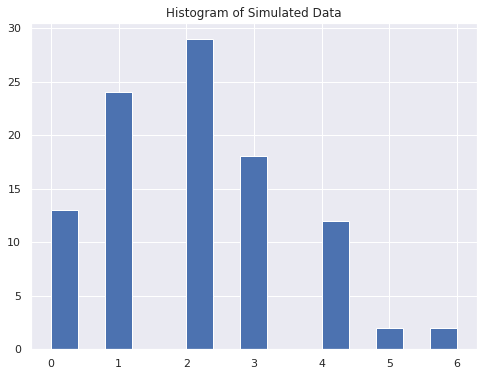

In [ ]:

%matplotlib inline

# Histogram of the sample.
plt.figure(figsize=(8, 6))
plt.hist(y, bins=15)
plt.title('Histogram of Simulated Data');

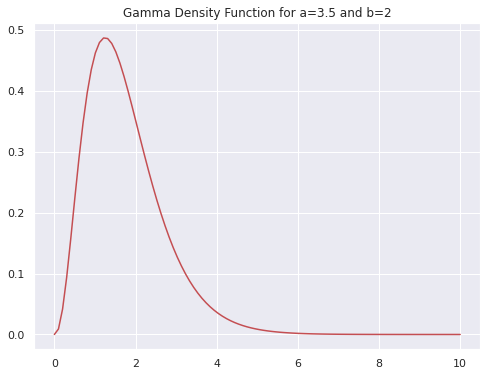

In [ ]:
# Parameters of the prior gamma distribution.
a = 3.5 # shape
b = 2 # rate = 1/scale

x = np.linspace(start=0, stop=10, num=100)

plt.figure(figsize=(8, 6))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Gamma Density Function for a={} and b={}'.format(a,b))

# Define the prior distribution.
prior = lambda x: ss.gamma.pdf(x, a=a, scale=1/b)

In [ ]:
import scipy.special as sp

# Define the likelihood function.
def likelihood(lam,y):
    
    factorials = np.apply_along_axis(
        lambda x: sp.gamma(x+1),
        axis=0,
        arr=y
    )
    
    numerator = np.exp(-lam*y.size)*(lam**y.sum())
    
    denominator = np.multiply.reduce(factorials)
    
    return numerator/denominator  

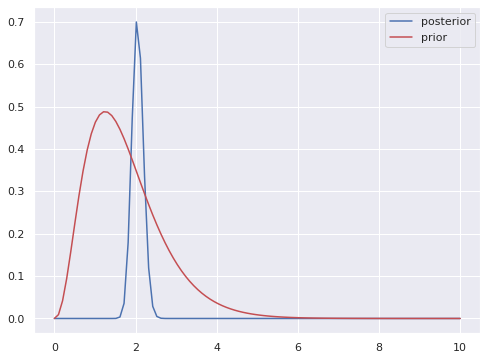

In [ ]:
# Define the posterior distribution.
# (up to a constant)
def posterior_up_to_constant(lam,y):
    return likelihood(lam,y)*prior(lam)

# Plot of the prior and (scaled) posterior distribution
# for the parameter lambda.
#
# We multiply the posterior distrubution function
# by the amplitude factor 2.5e74 to make it comparable
# with the prior gamma distribution.
plt.figure(figsize=(8, 6))
plt.plot(x, 2.0e74*posterior_up_to_constant(x,y), label='posterior')
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-', label='prior')
plt.legend();

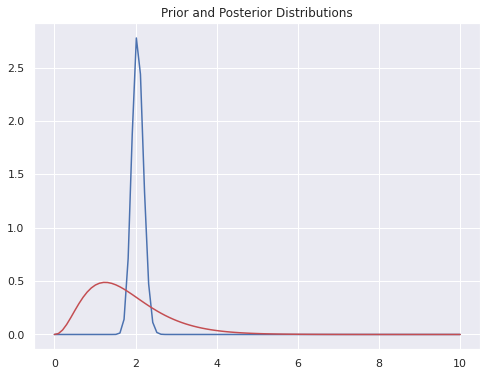

In [ ]:
def posterior(lam,y):
    
    shape = a + y.sum()
    rate = b + y.size
    
    return ss.gamma.pdf(lam, shape, scale=1/rate)

plt.figure(figsize=(8, 6))
plt.plot(x, posterior(x,y))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Prior and Posterior Distributions');

In [ ]:
shape = a + y.sum()
rate = b + y.size

# Posterior mean.
shape/rate


2.053921568627451

- Taking haemoglobin

In [ ]:



# sample array.
y = pd.DataFrame(data['haemoglobin']).to_numpy()

y

array([[15.4],
       [11.3],
       [ 9.6],
       [11.2],
       [11.6],
       [12.2],
       [12.4],
       [12.4],
       [10.8],
       [ 9.5],
       [ 9.4],
       [10.8],
       [ 9.7],
       [ 9.8],
       [ 5.6],
       [ 7.6],
       [12.6],
       [12.1],
       [12.7],
       [10.3],
       [ 7.7],
       [10.9],
       [ 9.8],
       [ 9.8],
       [11.1],
       [ 9.9],
       [11.6],
       [12.5],
       [12.5],
       [12.9],
       [12.9],
       [10.1],
       [11.3],
       [10.1],
       [10.1],
       [12. ],
       [10.3],
       [ 9.7],
       [12.5],
       [13. ],
       [11.1],
       [11.1],
       [ 9.7],
       [ 7.9],
       [ 9.7],
       [ 9.3],
       [12.4],
       [15. ],
       [10. ],
       [ 9.7],
       [ 8.6],
       [10.3],
       [10.9],
       [13.6],
       [13. ],
       [ 9.5],
       [10.2],
       [10.2],
       [10.5],
       [ 6.6],
       [ 6.6],
       [ 6.6],
       [11. ],
       [ 7.5],
       [ 9.8],
       [15. ],
       [15

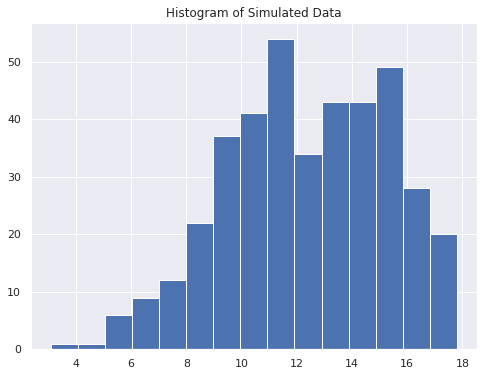

In [ ]:
%matplotlib inline

# Histogram of the sample.
plt.figure(figsize=(8, 6))
plt.hist(y, bins=15)
plt.title('Histogram of Simulated Data');

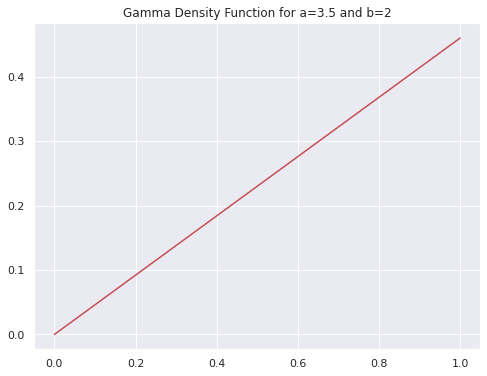

In [ ]:
# Parameters of the prior gamma distribution.
a = 3.5 # shape
b = 2 # rate = 1/scale

x = pd.DataFrame(data['classification']).to_numpy()

plt.figure(figsize=(8, 6))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Gamma Density Function for a={} and b={}'.format(a,b))

# Define the prior distribution.
prior = lambda x: ss.gamma.pdf(x, a=a, scale=1/b)

In [ ]:
# Define the likelihood function.
def likelihood(lam,y):
    
    factorials = np.apply_along_axis(
        lambda x: sp.gamma(x+1),
        axis=0,
        arr=y
    )
    
    numerator = np.exp(-lam*y.size)*(lam**y.sum())
    
    denominator = np.multiply.reduce(factorials)
    
    return numerator/denominator 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in reduce
  if sys.path[0] == '':


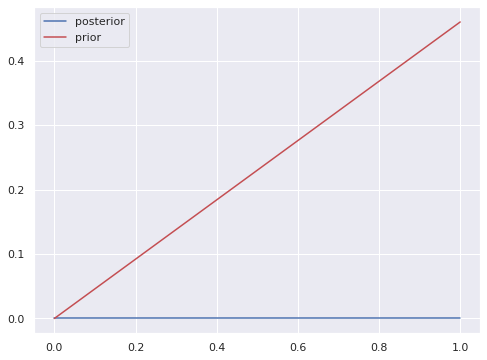

In [ ]:
# Define the posterior distribution.
# (up to a constant)
def posterior_up_to_constant(lam,y):
    return likelihood(lam,y)*prior(lam)

# Plot of the prior and (scaled) posterior distribution
# for the parameter lambda.
#
# We multiply the posterior distrubution function
# by the amplitude factor 2.5e74 to make it comparable
# with the prior gamma distribution.
plt.figure(figsize=(8, 6))
plt.plot(x, 2.0e74*posterior_up_to_constant(x,y), label='posterior')
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-', label='prior')
plt.legend();

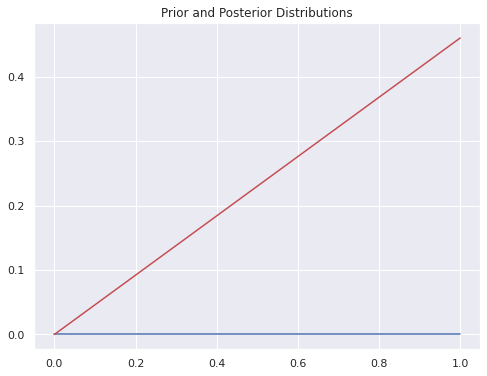

In [ ]:
def posterior(lam,y):
    
    shape = a + y.sum()
    rate = b + y.size
    
    return ss.gamma.pdf(lam, shape, scale=1/rate)

plt.figure(figsize=(8, 6))
plt.plot(x, posterior(x,y))
plt.plot(x, ss.gamma.pdf(x,a=a,scale=1/b), 'r-')
plt.title('Prior and Posterior Distributions');

In [ ]:
shape = a + y.sum()
rate = b + y.size

# Posterior mean.
shape/rate


12.27960199004975